In [3]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
from osgeo import gdal, ogr
import numpy as np
import os
import sys
import geopandas as gp
from rasterio.plot import show
import osgeo.osr as osr

In [6]:
# Function to get info from html's forms
def get_ndwi(green, nir, res):

    dst_crs = 'EPSG:3857'
    # To specife the main folders
    # a = os.listdir(r"C:/Users/rkoen/OneDrive/Документы/Cartometria/clipped" + r"/green_one")
    # b = os.listdir(r"C:/Users/rkoen/OneDrive/Документы/Cartometria/clipped" + r"/nir_one")
    path1 = green + "/"
    path2 = nir + "/"
    a = os.listdir(path1)
    b = os.listdir(path2)

    for i, y in zip(a, b):

        # Reading images
        # band3 = rasterio.open(path1 + i)
        # band5 = rasterio.open(path2 + y)
        ds_band3 = gdal.Open(path1 + i)
        ds_band5 = gdal.Open(path2 + y)
        
        dsReprj_3 = gdal.Warp(res + '/reprjct_' + i[13:27] + '_' + i[-6:], ds_band3, dstSRS=dst_crs)
        name_3 = res + '/reprjct_' + i[13:27] + '_' + i[-6:]
        dsReprj_5 = gdal.Warp(res + '/reprjct_' + y[13:27] + '_' + y[-6:], ds_band5, dstSRS=dst_crs)
        name_5 = res + '/reprjct_' + y[13:27] + '_' + y[-6:]
        
        band3 = rasterio.open(name_3)
        band5 = rasterio.open(name_5)
        
        # band3 = rasterio.open(r"C:/Users/rkoen/OneDrive/Документы/Cartometria/clipped/green_one/" + i)
        # band5 = rasterio.open(r"C:/Users/rkoen/OneDrive/Документы/Cartometria/clipped/nir_one/" + y)
#         green = band3.read(1).astype('float64')
#         nir = band5.read(1).astype('float64')


#         # Calculating NDWI
#         ndwi = np.where(
#             (green - nir)==0., 
#             0, 
#         (green-nir)/(green + nir))
#         ndwi[:5,:5]
        
#         # Saving NDWI
#         ndwiImage = rasterio.open(res + '/ndwi_' + i,'w',driver='Gtiff',
#                             width=band3.width, 
#                             height = band3.height, 
#                             count=1, 
#                             crs=band3.crs, 
#                             transform=band3.transform, 
#                             dtype='float64')
#         ndwiImage.write(ndwi,1)
#         ndwiImage.close()
        
#         #Classyfing Index (Selecting only water objects >0.4)
#         raster = rasterio.open(res + '/ndwi_' + i)
#         raster_r = raster.read()
#         lista = raster_r.copy()
#         lista[np.where(lista >= 0.4)] = 1
#         lista[np.where(lista < 0.4)] = 0
#         with rasterio.open(res + '/ndwi_' + i + '_class' + '.TIF', 'w',
#                            driver=raster.driver,
#                            height=raster.height,
#                            width=raster.width,
#                            count=raster.count,
#                            crs=raster.crs,
#                            transform=raster.transform,
#                            dtype=rasterio.float64
#                           ) as dst:
#             dst.write(lista)
        
#         #Vectorize image
#         b = gdal.Open(res + '/ndwi_' + i + '_class' + '.TIF')
#         b.RasterCount
#         d = b.GetRasterBand(1) 
#         print(b.RasterCount)
#         drv = ogr.GetDriverByName('ESRI Shapefile')
#         outfile = drv.CreateDataSource(res + '/ndwi_' + i + '_class' + '.shp') 
#         outlayer = outfile.CreateLayer('polygonized raster', srs = None )
#         newField = ogr.FieldDefn('Water', ogr.OFTReal)
#         outlayer.CreateField(newField)
#         gdal.Polygonize(d, None, outlayer, 0, [])
#         outfile = None
        
#         #Querying only vector water objects
#         vec_crs = gp.read_file(res + '/ndwi_' + i + '_class' + '.shp')
#         vec_crs = vec_crs.set_crs(epsg=3857)
#         vec3 = vec_crs[vec_crs["Water"].isin([1])]
#         vec3 = vec3.set_crs(epsg=3857)
#         vec3.to_file(res + '/ndwi_' + i + '_class_selected' + '.shp')                   
                           

        

In [7]:
get_ndwi(r'C:\Users\karasu\earth-analytics\data\green', r'C:\Users\karasu\earth-analytics\data\nir', 'D:/diplom/data_process')

In [4]:
vec = gp.read_file(r'C:\Users\karasu\Downloads\polygonized (1).shp')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MYFLD     1899 non-null   int64   
 1   geometry  1899 non-null   geometry
dtypes: geometry(1), int64(1)
memory usage: 29.8 KB
EPSG:32643


TypeError: in method 'DataSource_CreateLayer', argument 3 of type 'OSRSpatialReferenceShadow *'

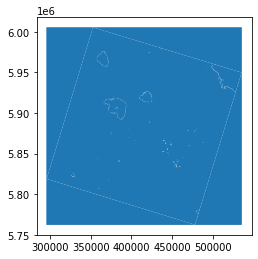

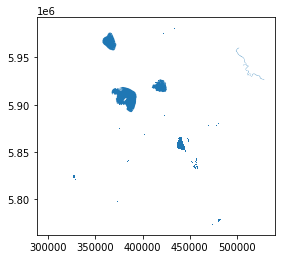

In [16]:
vec.info()
vec.plot()
new_vec = vec[vec['MYFLD'].isin([1])]
new_vec.plot()

c = rasterio.open(r'C:\Users\karasu\earth-analytics\data\reclass.TIF')
cr = c.crs
print(cr)

sourceRaster = gdal.Open(r'C:\Users\karasu\earth-analytics\data\ndwi_vl_04.tif')
band = sourceRaster.GetRasterBand(1)
bandArray = band.ReadAsArray()
outShapefile = r"C:\Users\karasu\earth-analytics\data\polygonized2"
driver = ogr.GetDriverByName("ESRI Shapefile")
if os.path.exists(outShapefile+".shp"):
    driver.DeleteDataSource(outShapefile+".shp")
outDatasource = driver.CreateDataSource(outShapefile+ ".shp")
outLayer = outDatasource.CreateLayer("polygonized", srs='EPSG:32643')
newField = ogr.FieldDefn('DN', ogr.OFTInteger)
outLayer.CreateField(newField)
gdal.Polygonize( band, None, outLayer, 0, [], callback=None )
outDatasource.Destroy()
sourceRaster = None

C:\Users\karasu\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


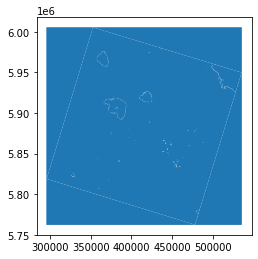

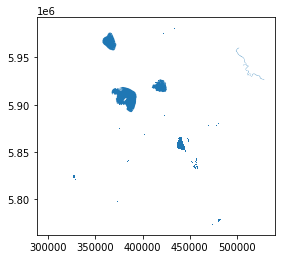

In [5]:
vec2 = gp.read_file(r"C:\Users\karasu\earth-analytics\data\polygonized2.shp")
vec3 = vec2[vec2["DN"].isin([1])]
vec2.plot()
vec3.plot()
vec3.to_file(r'C:\Users\karasu\earth-analytics\data\test.json')

In [9]:
rf = r'C:\Users\karasu\earth-analytics\data\ndwi_RT_LC08_L1TP_154023_20200913_20200920_01_T1_2020-09-13_B3.TIF'
raster = rasterio.open(rf)
raster_r = raster.read()
lista = raster_r.copy()
lista[np.where(lista >= 0.4)] = 1
lista[np.where(lista < 0.4)] = 0
with rasterio.open(r'C:\Users\karasu\earth-analytics\data\reclass_2.TIF', 'w',
                   driver=raster.driver,
                   height=raster.height,
                   width=raster.width,
                   count=raster.count,
                   crs='EPSG:3857',
                   transform=raster.transform,
                   dtype=rasterio.float64
                  ) as dst:
    dst.write(lista)

In [14]:
c = rasterio.open(r'C:\Users\karasu\earth-analytics\data\reclass.TIF')
print(c.crs)
ds = gdal.Open(r'C:\Users\karasu\earth-analytics\data\nir\RT_LC08_L1TP_154023_20200913_20200920_01_T1_2020-09-13_B5.TIF')
dsReprj = gdal.Warp(r'C:\Users\karasu\earth-analytics\data\repr_2.TIF', ds, dstSRS='EPSG:3857')
ds2 = rasterio.open(r'C:\Users\karasu\earth-analytics\data\repr_2.TIF')
ds2.read(1).astype('float64')

EPSG:32643


array([[65535., 65535., 65535., ..., 65535., 65535., 65535.],
       [65535., 65535., 65535., ..., 65535., 65535., 65535.],
       [65535., 65535., 65535., ..., 65535., 65535., 65535.],
       ...,
       [65535., 65535., 65535., ..., 65535., 65535., 65535.],
       [65535., 65535., 65535., ..., 65535., 65535., 65535.],
       [65535., 65535., 65535., ..., 65535., 65535., 65535.]])

C:\Users\karasu\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


EPSG:32643


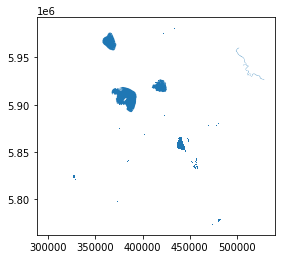

In [6]:
vec = gp.read_file(r'C:\Users\karasu\Downloads\polygonized (1).shp')
vec.crs = {'init' :'epsg:32643'}
new_vec = vec[vec['MYFLD'].isin([1])]
new_vec.plot()
c = rasterio.open(r'C:\Users\karasu\earth-analytics\data\reclass.TIF')
cr = c.crs
print(cr)

# sourceRaster = gdal.Open(r'C:\Users\karasu\earth-analytics\data\ndwi_vl_04.tif')C:\Users\karasu\earth-analytics\data\reclass.TIF
sourceRaster = gdal.Open(r'C:\Users\karasu\earth-analytics\data\reclass.TIF')
band = sourceRaster.GetRasterBand(1)
bandArray = band.ReadAsArray()
outShapefile = r"C:\Users\karasu\earth-analytics\data\polygonized2"
driver = ogr.GetDriverByName("ESRI Shapefile")
if os.path.exists(outShapefile+".shp"):
    driver.DeleteDataSource(outShapefile+".shp")
outDatasource = driver.CreateDataSource(outShapefile+ ".shp")
outLayer = outDatasource.CreateLayer("polygonized", srs=None)
newField = ogr.FieldDefn('DN', ogr.OFTInteger)
outLayer.CreateField(newField)
polig = gdal.Polygonize( band, None, outLayer, 0, [], callback=None )
outDatasource.Destroy()
sourceRaster = None


In [18]:
vec.crs = {'init' :'epsg:32643'}
print(vec.crs)

+init=epsg:32643 +type=crs


In [5]:
b = gdal.Open(r'C:\Users\karasu\earth-analytics\data\reclass.TIF')
b.RasterCount
d = b.GetRasterBand(1) 
print(b.RasterCount)
drv = ogr.GetDriverByName('ESRI Shapefile')
outfile = drv.CreateDataSource(r'C:\Users\karasu\earth-analytics\data\polygonizedRaster2.shp') 
outlayer = outfile.CreateLayer('polygonized raster', srs = None )
newField = ogr.FieldDefn('DN', ogr.OFTReal)
outlayer.CreateField(newField)
gdal.Polygonize(d, None, outlayer, 0, [])
outfile = None

1


In [39]:
vec_crs = gp.read_file(r'C:\Users\karasu\earth-analytics\data\polygonizedRaster.shp')
vec_crs = vec_crs.set_crs(epsg=32643)
print(vec_crs.crs)
vec_crs.to_file(r'C:\Users\karasu\earth-analytics\data\test_crs_3.geojson', driver='GeoJSON')

epsg:32643


C:\Users\karasu\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [7]:
c = rasterio.open(r'C:\Users\karasu\earth-analytics\data\reclass.TIF')
print(c.crs)

EPSG:32643


In [17]:
def get_ndwi(green, nir, res):

    dst_crs = 'EPSG:3857'
    # To specife the main folders
    # a = os.listdir(r"C:/Users/rkoen/OneDrive/Документы/Cartometria/clipped" + r"/green_one")
    # b = os.listdir(r"C:/Users/rkoen/OneDrive/Документы/Cartometria/clipped" + r"/nir_one")
    path1 = green + "/"
    path2 = nir + "/"
    a = os.listdir(path1)
    b = os.listdir(path2)

    for i, y in zip(a, b):
        print(i)
        
get_ndwi(r'D:\diplom\data\green', r'D:\diplom\data\nir', 'D:/diplom/data_process')

RT_LC08_L1TP_154023_20200913_20200920_01_T1_2020-09-13_B3.TIF
RT_LC08_L1TP_154024_20200913_20200920_01_T1_2020-09-13_B3.TIF
RT_LC08_L1TP_154025_20200913_20200920_01_T1_2020-09-13_B3.TIF
RT_LC08_L1TP_155023_20190716_20190721_01_T1_2019-07-16_B3.TIF
RT_LC08_L1TP_155024_20190716_20190721_01_T1_2019-07-16_B3.TIF
RT_LC08_L1TP_155025_20200531_20200608_01_T1_2020-05-31_B3.TIF
RT_LC08_L1TP_156023_20180704_20180717_01_T1_2018-07-04_B3.TIF
RT_LC08_L1TP_156024_20180704_20180717_01_T1_2018-07-04_B3.TIF
RT_LC08_L1TP_156025_20180704_20180717_01_T1_2018-07-04_B3.TIF
RT_LC08_L1TP_157023_20200902_20200906_01_T1_2020-09-02_B3.TIF
RT_LC08_L1TP_157024_20200902_20200906_01_T1_2020-09-02_B3.TIF
RT_LC08_L1TP_157025_20200902_20200906_01_T1_2020-09-02_B3.TIF
RT_LC08_L1TP_158024_20200909_20200918_01_T1_2020-09-09_B3.TIF
RT_LC08_L1TP_158025_20200621_20200707_01_T1_2020-06-21_B3.TIF
RT_LC08_L1TP_159024_20200714_20200722_01_T1_2020-07-14_B3.TIF
